In [1]:
import pandas as pd
from keras.models import Model
from keras.layers import Dense,Input
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv("../datasets/mnist_train_small.csv").values

In [46]:
X = data[:,2:]
y= data[:,1]

In [47]:
ohe = OneHotEncoder(categories="auto")
y_hot = ohe.fit_transform(y.reshape(-1,1)).todense()
y_sec = ohe.fit_transform((9-y).reshape(-1,1)).todense()
#we can change the 9-y to anyform we want for example (y<5).astype(int) so this output will present if the no is less than 5 or not based on 0(false)an 1(true) 

In [48]:
# X_train, X_test, y_train, y_test = train_test_split(
# ...     X, y_hot, test_size=0.33, random_state=42)

In [49]:
inp_layer = Input(shape=[784])
layer_1 = Dense(200,activation="tanh")(inp_layer)
layer_21 = Dense(50,activation="tanh")(layer_1)
layer_22 = Dense(50,activation="tanh")(layer_1)
layer_31 = Dense(10,activation="softmax")(layer_21)
layer_32 = Dense(10,activation="softmax")(layer_22)


In [50]:
model = Model(inputs=[inp_layer],output=[layer_31,layer_32])

c:\users\gippy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  """Entry point for launching an IPython kernel.


In [51]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 200)          157000      input_5[0][0]                    
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 50)           10050       dense_21[0][0]                   
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 50)           10050       dense_21[0][0]                   
__________________________________________________________________________________________________
dense_24 (

In [52]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [54]:
hist = model.fit(X,[y_hot,y_sec],epochs=10,batch_size=200)

Epoch 1/10
8000/8000 [==============================] - 2s 208us/step - loss: 2.7031 - dense_24_loss: 1.3806 - dense_25_loss: 1.3225 - dense_24_acc: 0.5735 - dense_25_acc: 0.5984
Epoch 2/10
8000/8000 [==============================] - 1s 93us/step - loss: 1.2600 - dense_24_loss: 0.6367 - dense_25_loss: 0.6233 - dense_24_acc: 0.8290 - dense_25_acc: 0.8261
Epoch 3/10
8000/8000 [==============================] - 1s 99us/step - loss: 0.9578 - dense_24_loss: 0.4797 - dense_25_loss: 0.4781 - dense_24_acc: 0.8673 - dense_25_acc: 0.8649
Epoch 4/10
8000/8000 [==============================] - 1s 94us/step - loss: 0.8124 - dense_24_loss: 0.4060 - dense_25_loss: 0.4064 - dense_24_acc: 0.8901 - dense_25_acc: 0.8870
Epoch 5/10
8000/8000 [==============================] - 1s 84us/step - loss: 0.7279 - dense_24_loss: 0.3626 - dense_25_loss: 0.3653 - dense_24_acc: 0.9039 - dense_25_acc: 0.9005
Epoch 6/10
8000/8000 [==============================] - 1s 87us/step - loss: 0.6575 - dense_24_loss: 0.3320 -

In [55]:
hist.history

{'loss': [2.7031438678503035,
  1.2600081145763398,
  0.9578129678964615,
  0.8124022111296654,
  0.727912487089634,
  0.6575461938977242,
  0.6212658427655697,
  0.5748035751283169,
  0.5557942681014538,
  0.5529519155621528],
 'dense_24_loss': [1.3806072145700454,
  0.6367231667041778,
  0.4797437347471714,
  0.4059908889234066,
  0.36261349618434907,
  0.33197746723890303,
  0.31412697248160837,
  0.2941960696130991,
  0.2813675828278065,
  0.28022828735411165],
 'dense_25_loss': [1.3225366666913032,
  0.6232849426567555,
  0.47806923985481264,
  0.40641131848096845,
  0.36529899165034296,
  0.32556871958076955,
  0.3071388714015484,
  0.2806075006723404,
  0.2744266837835312,
  0.2727236278355122],
 'dense_24_acc': [0.5734999964013696,
  0.829000000655651,
  0.8672500044107437,
  0.8901250019669533,
  0.9038750007748604,
  0.9033750012516976,
  0.9093749925494194,
  0.9151250019669532,
  0.9208750009536744,
  0.9156249985098839],
 'dense_25_acc': [0.5983749998733401,
  0.8261249974

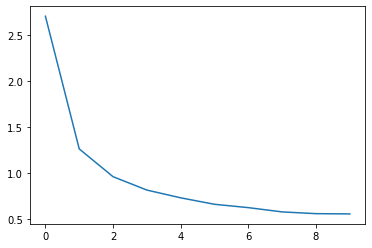

In [56]:
plt.plot(hist.history["loss"])

In [60]:
np.argmax(model.predict(X[:1]),axis=1)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [66]:
out = model.predict(X[:10])

In [67]:
o1 = out[0]
np.argmax(o1,axis=1)

array([0, 4, 1, 9, 2, 1, 3, 1, 4, 3], dtype=int64)

In [68]:
o2 = out[1]
np.argmax(o2,axis=1)

array([9, 5, 8, 0, 7, 8, 6, 8, 5, 6], dtype=int64)

In [69]:
y[:10]

array([0, 4, 1, 9, 2, 1, 3, 1, 4, 3], dtype=int64)